# Librerias

In [1]:
import pandas as pd
import missingno as msno
import numpy as np

In [3]:
movies = pd.read_csv(r"../data/movie.csv")

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [6]:
# nombre de columnas
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [7]:
# Cambiar nombre de columnas
movies = movies.rename(
    columns={
        "movieId": "movieid",
    }
)

In [8]:
movies.columns

Index(['movieid', 'title', 'genres'], dtype='object')

Visualizar valores ausente y valores unicos

In [9]:
# Visualizar valores unicos
valores_unicos = movies.nunique()

In [10]:
# Cuantos valores ausentes 
valores_ausentes = movies.isnull().sum()

In [11]:
movies.columns

Index(['movieid', 'title', 'genres'], dtype='object')

In [12]:
type(movies)

pandas.core.frame.DataFrame

In [13]:
movies.isnull().sum().info()

<class 'pandas.core.series.Series'>
Index: 3 entries, movieid to genres
Series name: None
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


In [16]:
# Suma de Nulos que estan en la columna rating_esrb
movies.isnull().sum()["genres"]

np.int64(0)

In [17]:
tota_datos = len(movies)

In [18]:
# Convertir un tipo de dato a otro
datos_generales = pd.DataFrame({
    "Valores unicos": valores_unicos,
    "Nulos": valores_ausentes
})
datos_generales

,Valores unicos,Nulos
movieid,27278,0
title,27262,0
genres,1342,0


In [19]:
# Porcentaje de ausentes en todas las columnas con formateados round
round(movies.isnull().mean() * 100 , 1)

movieid    0.0
title      0.0
genres     0.0
dtype: float64

Cantidad de valores no nulos (grafico)

<Axes: >

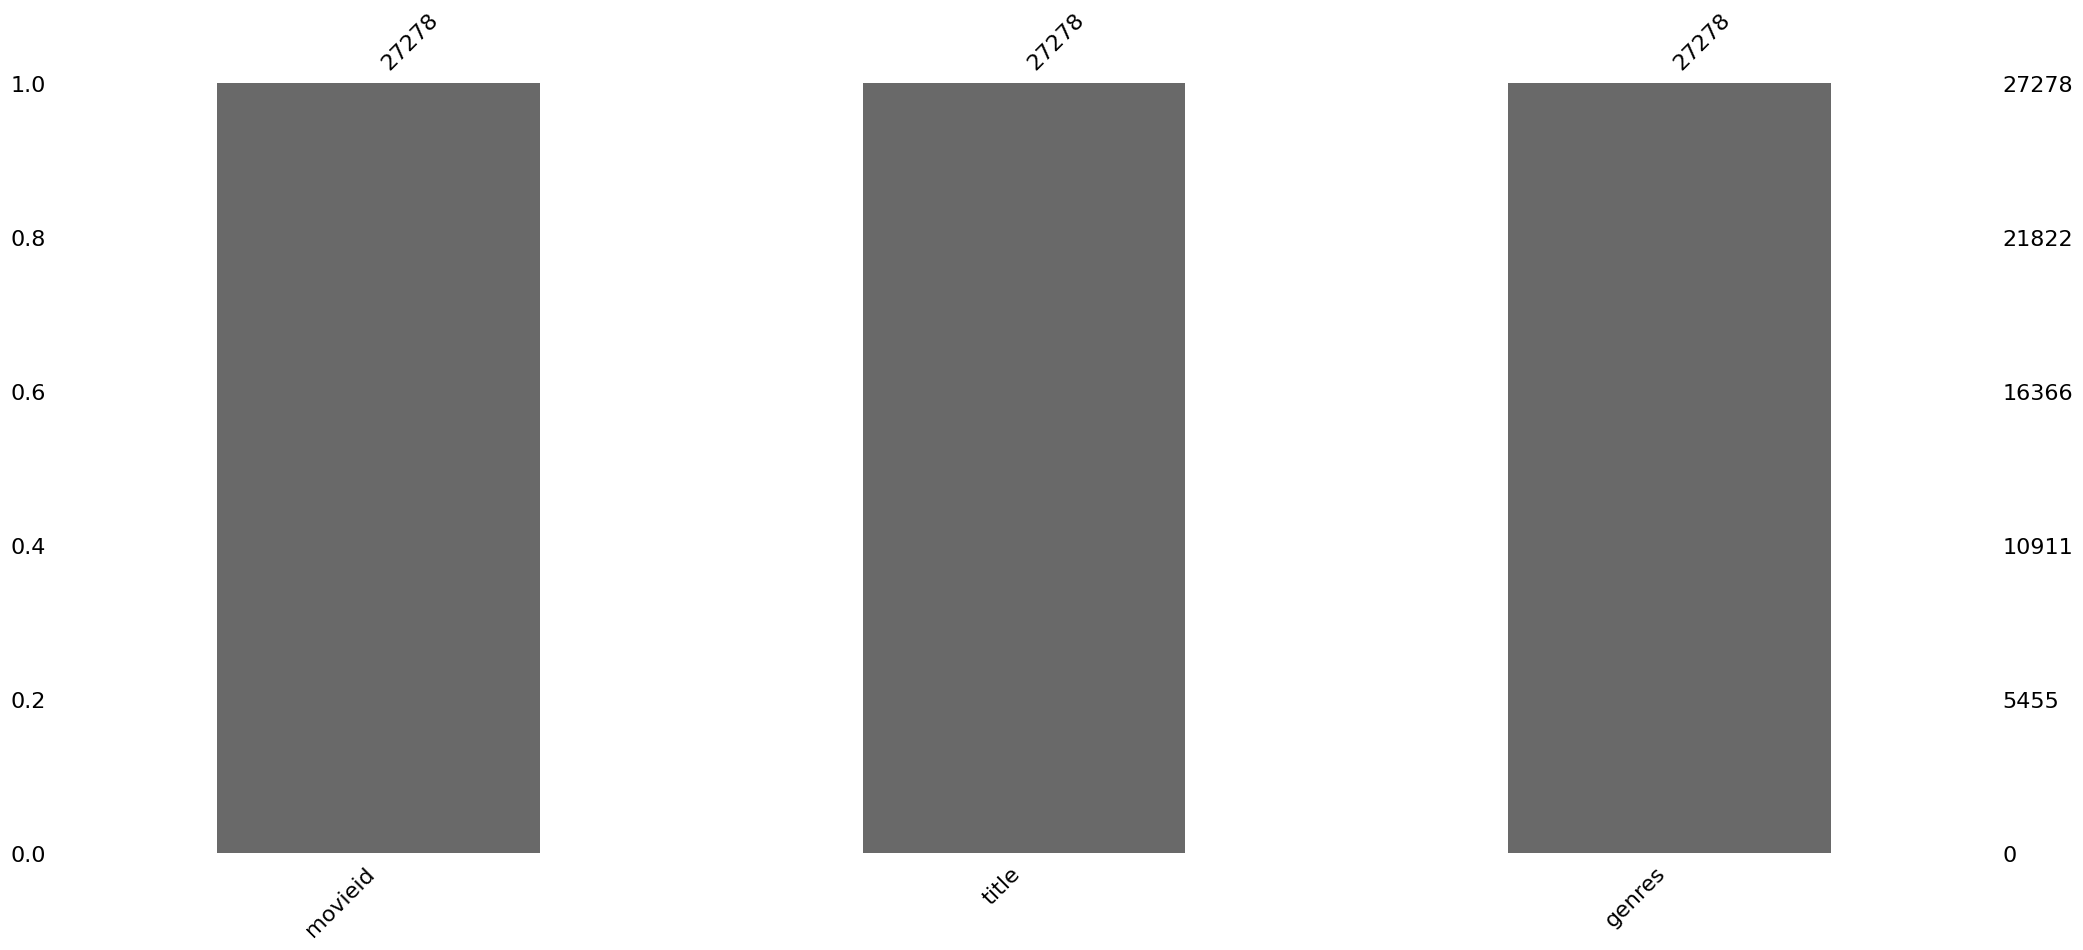

In [20]:
# Crear distintos graficos para visualizar mejor forma los datos
msno.bar(movies)

Matriz de valores ausentes

<Axes: >

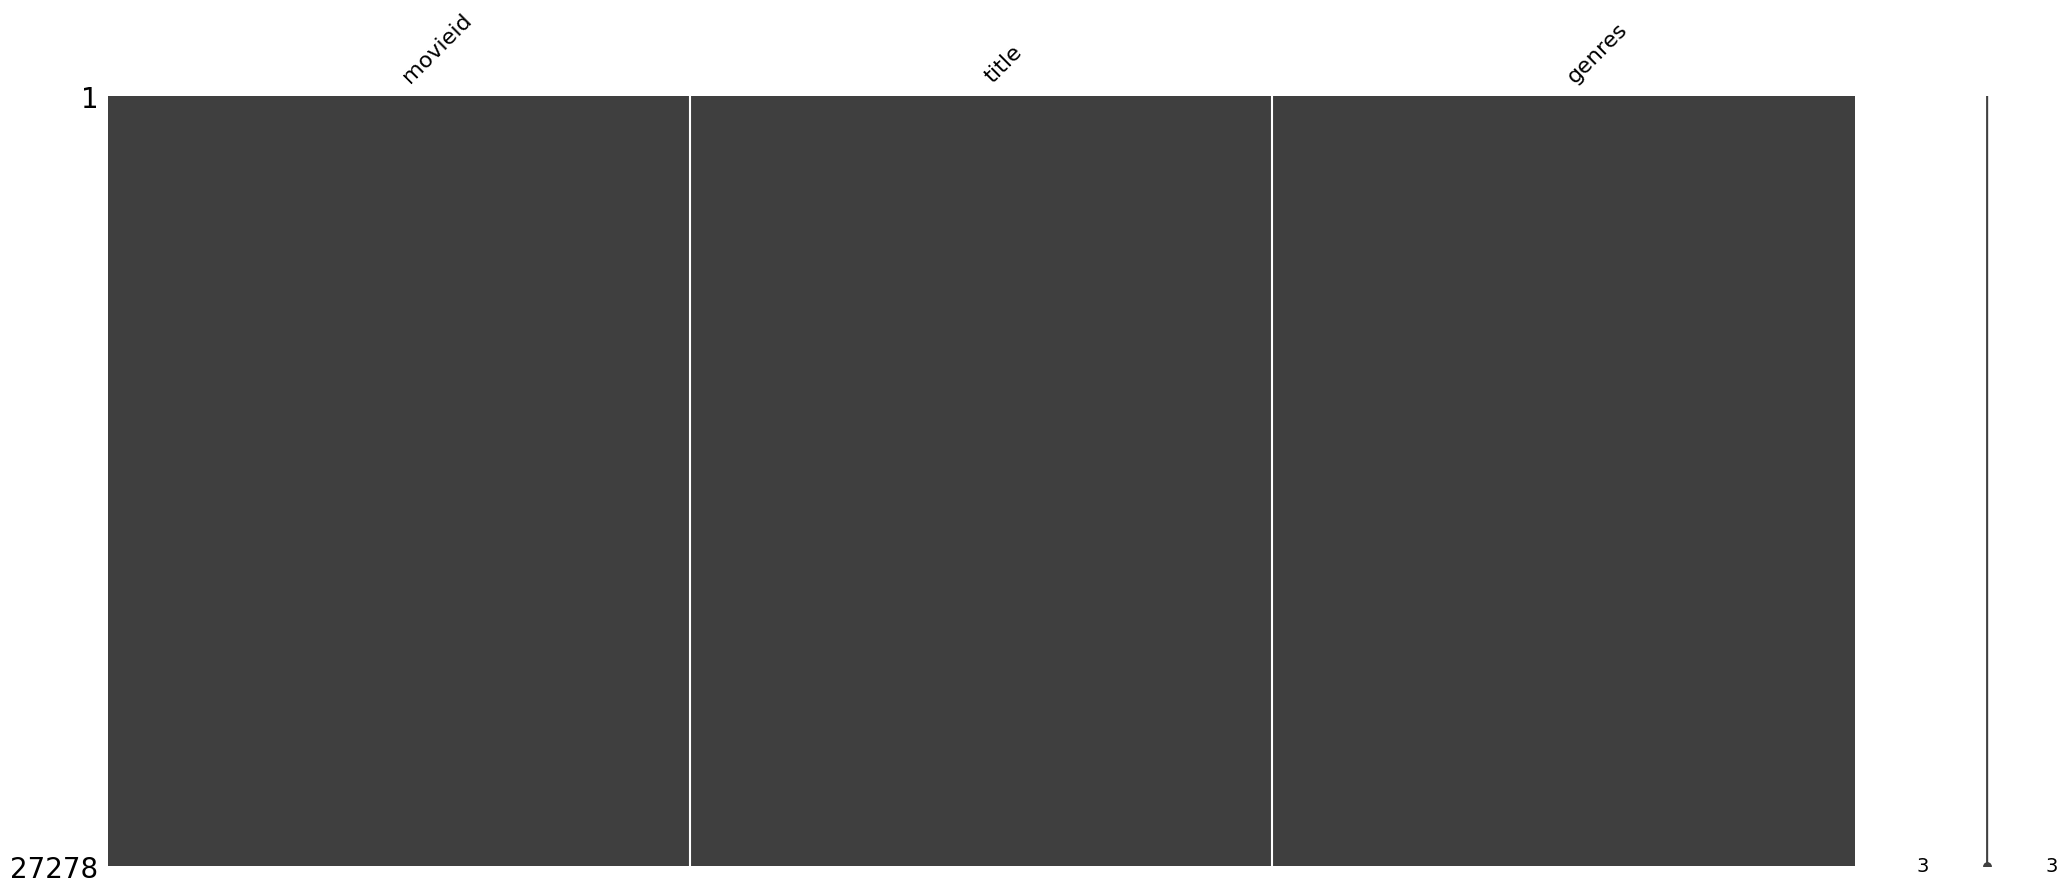

In [21]:
# Matriz de valores ausentes 
msno.matrix(movies)

La librería `missingno` se concentra en visualizar y analizar datos en valores ausentes

## HEATMAP

Este es un mapa de calor, que indica valores ausentes.

Por ejemplo genre vs name, nos indica que hay valores ausentes en dos filas

User Score vs Critic Store tiene 0.8, es decir en casi todas hay datos ausentes y quiere decir que donde es ausente en User Score tambien es ausente en Critic Store

d:\Personal\UNIANDES\OneDrive\OneDrive - UNIANDES\SEMINARIO\Proyecto\seminario-complexivo-grupo8\venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\Personal\UNIANDES\OneDrive\OneDrive - UNIANDES\SEMINARIO\Proyecto\seminario-complexivo-grupo8\venv\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

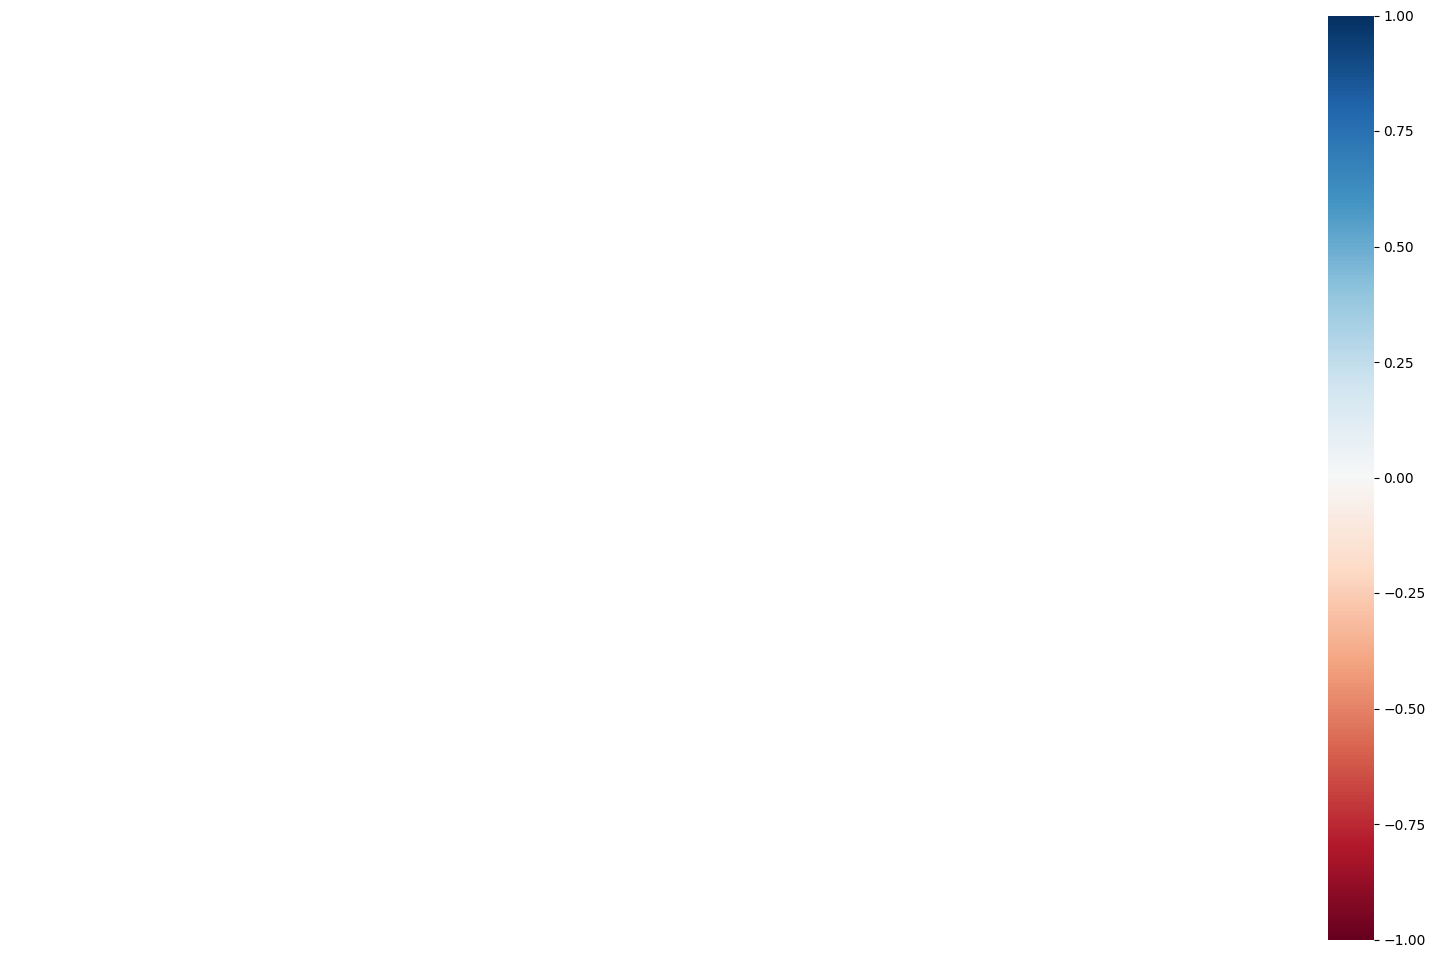

In [22]:
msno.heatmap(movies)

## Analizar de forma rápida los datos por columnas

Conteo total de datos categoricos numericos continuos.  

*Frecuencia o distribución de los datos*

In [24]:
movies["genres"].value_counts(normalize=True) * 100 

genres
Drama                                      16.570130
Comedy                                      8.409707
Documentary                                 7.119290
Comedy|Drama                                4.633771
Drama|Romance                               3.940905
                                             ...    
Action|Mystery|Romance|Western              0.003666
Adventure|Children|Comedy|Drama|Fantasy     0.003666
Animation|Comedy|Horror                     0.003666
Adventure|Crime|Mystery|Romance             0.003666
Adventure|Children|Documentary|Drama        0.003666
Name: proportion, Length: 1342, dtype: float64

Aqui podemos ver si hay columnas iguales pero case sensitive diferente ej: "Sports" y "sports"

## Automatización del código

In [25]:
movies.columns

Index(['movieid', 'title', 'genres'], dtype='object')

In [26]:
for column in movies.columns:
    print(f"------- {column} --------")
    p = movies[column].value_counts(normalize=True, dropna=False) * 100 
    print(p)
    print()
    
    # NAN -> valores ausentes 

------- movieid --------
movieid
1         0.003666
2         0.003666
3         0.003666
4         0.003666
5         0.003666
            ...   
131254    0.003666
131256    0.003666
131258    0.003666
131260    0.003666
131262    0.003666
Name: proportion, Length: 27278, dtype: float64

------- title --------
title
Casanova (2005)                                                    0.007332
Chaos (2005)                                                       0.007332
Men with Guns (1997)                                               0.007332
Offside (2006)                                                     0.007332
War of the Worlds (2005)                                           0.007332
                                                                     ...   
Othello (1995)                                                     0.003666
Now and Then (1995)                                                0.003666
Persuasion (1995)                                                  0.003

Ver tipos de datos

In [27]:
movies.dtypes

# tbd -> no determinado

movieid     int64
title      object
genres     object
dtype: object

## ResetIndex

Ordenar los resuntados por una columna diferente a la del valor de porcentaje

reset_index() -> rerita el indice a la columna por defecto y crea una nueva danto la secuencia de 0 en adelante. 

sort_values() -> determina la columna por la que se ordenará

In [29]:
df = (movies["genres"].value_counts(normalize=True)*100).reset_index().sort_values(by="genres", ascending=True)
df

,genres,proportion
14,(no genres listed),0.901826
18,Action,0.652541
42,Action|Adventure,0.315272
157,Action|Adventure|Animation,0.065987
273,Action|Adventure|Animation|Children,0.029328
...,...,...
239,Thriller|War,0.032994
557,Thriller|Western,0.007332
103,War,0.117311
442,War|Western,0.010998


## Resumen estadistico .describe()

Sobre las columnas numericas

- count -> total
- mean-> promedio
- std -> desviación estándar
- min -> valor minimo 
- max -> valor maximo

In [30]:
movies.describe()

,movieid
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


Estadistica de los objetos => strings

In [31]:
categorical_data = movies.select_dtypes(include="object")
categorical_data.describe()

,title,genres
count,27278,27278
unique,27262,1342
top,Casanova (2005),Drama
freq,2,4520


In [32]:
numerical_data = movies.select_dtypes(include="int64")
numerical_data

,movieid
0,1
1,2
2,3
3,4
4,5
...,...
27273,131254
27274,131256
27275,131258
27276,131260


Cambiar el tipo de dato a una columna

In [33]:
movies.columns

Index(['movieid', 'title', 'genres'], dtype='object')

## Limpiando la columna user_score

In [34]:
movies["movieid"].value_counts(dropna=False)
# tbd -> NAN not a number -> vacio -> no existe

movieid
1         1
2         1
3         1
4         1
5         1
         ..
131254    1
131256    1
131258    1
131260    1
131262    1
Name: count, Length: 27278, dtype: int64

In [ ]:
# Reemplazar valores de columnas especificamente tbd o nan
movies["User_Score"] = movies["User_Score"].replace("tbd", np.nan)
#np.nan -> es un valor formateado coreectamente como ausente
movies["User_Score"].value_counts(dropna=False)

User_Score
NaN    9125
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64